In [4]:
!pip install plotly


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from numba import jit
from quantimpy import minkowski as mk
%matplotlib inline

# Calculating the Minkowski Functionals of a Sphere

In [3]:
# Create a 3D image (volume) with a spherical shape
volume = np.zeros([128, 128, 128], dtype=bool)
radius = 45
center = (64, 64, 64)
rr, cc, zz = np.indices(volume.shape)
mask = (rr - center[0])**2 + (cc - center[1])**2 + (zz - center[2])**2 <= radius**2
volume[mask] = True

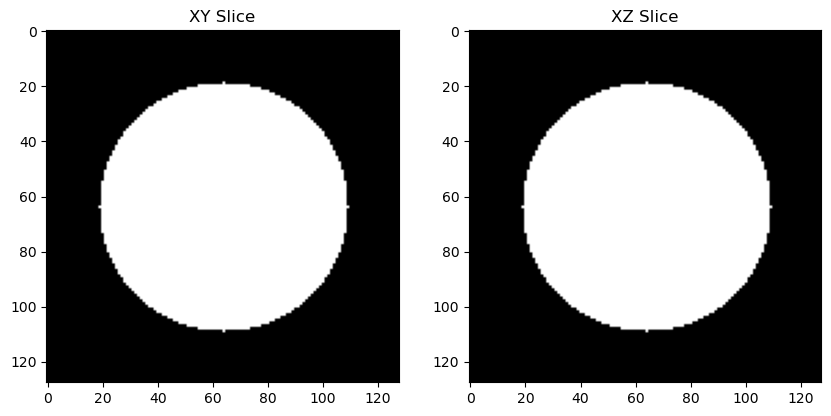

In [4]:
# Visualize a slice of the 3D volume
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('XY Slice')
plt.imshow(volume[:, :, center[2]], cmap='gray')

plt.subplot(1, 2, 2)
plt.title('XZ Slice')
plt.imshow(volume[center[0], :, :], cmap='gray')

plt.show()

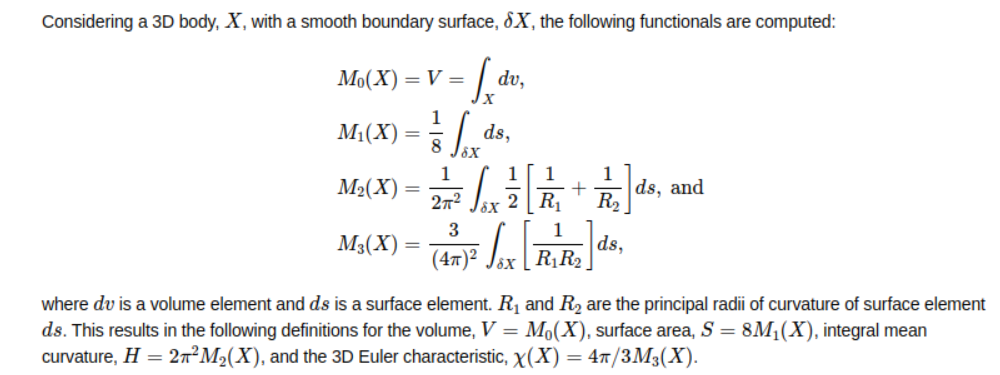

In [5]:
from quantimpy import minkowski as mk

# Compute the Minkowski functionals
minkowski = mk.functionals(volume)
print(minkowski)

(381915.0, 3181.7851170755234, 28.66165754607727, 0.238732414637843)


In [6]:
print("Volume of the Sphere is found to be")
vol = 4 * np.pi * (radius**3) / 3
print(vol)
print("Surface area of the spehere is found to be")
sa = 4 * np.pi * (radius**2)
print(sa)
print(sa/minkowski[1])


Volume of the Sphere is found to be
381703.50741115987
Surface area of the spehere is found to be
25446.900494077323
7.997680408244022


# Radius Variance of Minkowski Functionals

In [40]:
# Parameters
volume_size = 5  # Number of sub-cubes in each dimension
sub_cube_size = 20  # Size of each sub-cube
ball_radius = 0.5  # Radius of each ball

# Create the 3D volume
volume = np.zeros((volume_size * sub_cube_size, volume_size * sub_cube_size, volume_size * sub_cube_size), dtype=bool)

# Function to add balls to the volume
def add_balls(volume, sub_cube_size, ball_radius):
    # Create a grid of coordinates
    z, y, x = np.indices(volume.shape)

    # Initialize indices for the center of each sub-cube
    centers = np.array([(i * sub_cube_size + sub_cube_size // 2, 
                         j * sub_cube_size + sub_cube_size // 2, 
                         k * sub_cube_size + sub_cube_size // 2) 
                        for i in range(volume_size) 
                        for j in range(volume_size) 
                        for k in range(volume_size)])
    
    # Iterate over the centers and set the corresponding regions to True
    for center_x, center_y, center_z in centers:
        dist_from_center = np.sqrt((x - center_x)**2 + (y - center_y)**2 + (z - center_z)**2)
        volume[dist_from_center <= ball_radius] = True
    return volume



# Add balls to the volume
volume = add_balls(volume, sub_cube_size, ball_radius)



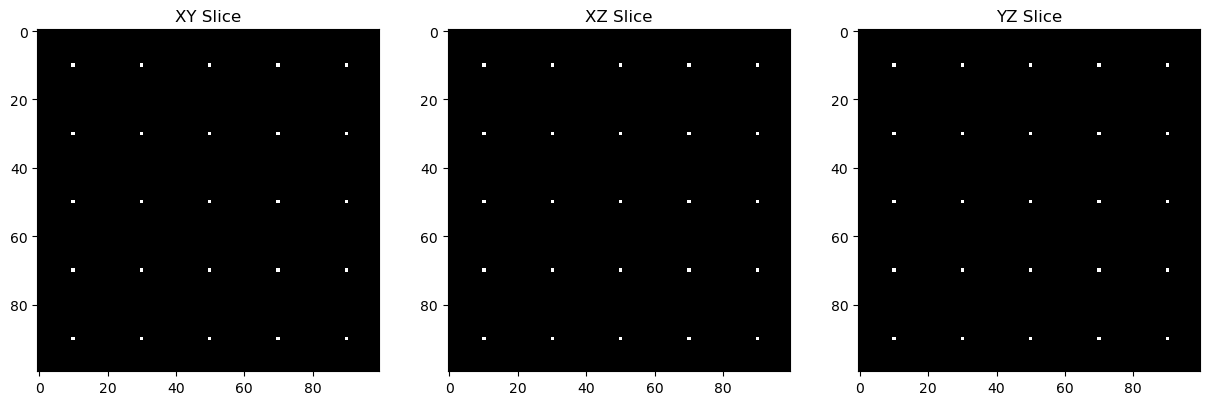

In [41]:

# Visualize some slices of the volume
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.title('XY Slice')
plt.imshow(volume[:, :, volume.shape[2] // 2], cmap='gray')

plt.subplot(1, 3, 2)
plt.title('XZ Slice')
plt.imshow(volume[volume.shape[0] // 2, :, :], cmap='gray')

plt.subplot(1, 3, 3)
plt.title('YZ Slice')
plt.imshow(volume[:, volume.shape[1] // 2, :], cmap='gray')

plt.show()

In [42]:
# Compute the Minkowski functionals
minkowski = mk.functionals(volume)
print(minkowski)

(125.0, 44.966147570838004, 29.882139402919602, 29.841551829730374)


100%|██████████| 20/20 [00:29<00:00,  1.49s/it]


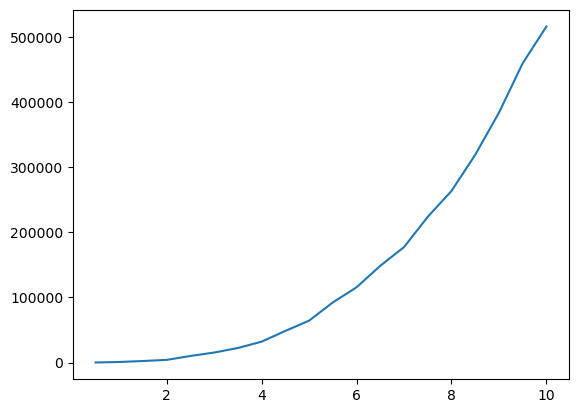

In [43]:
# Function to add balls to the volume


def minkowski_change_with_radius(ball_radius):
    # Create the 3D volume
    volume = np.zeros((volume_size * sub_cube_size, volume_size * sub_cube_size, volume_size * sub_cube_size), dtype=bool)

    # Add balls to the volume
    add_balls(volume, sub_cube_size, ball_radius)
    # Compute the Minkowski functionals
    minkowski = mk.functionals(volume)
    return minkowski

radius = [0.5 + i * 0.5 for i in range(20)]
minkowski_volume = []

for ball_radius in tqdm(radius):
    minkowski_volume.append(minkowski_change_with_radius(ball_radius=ball_radius)[0])

plt.plot(radius, minkowski_volume,)
    

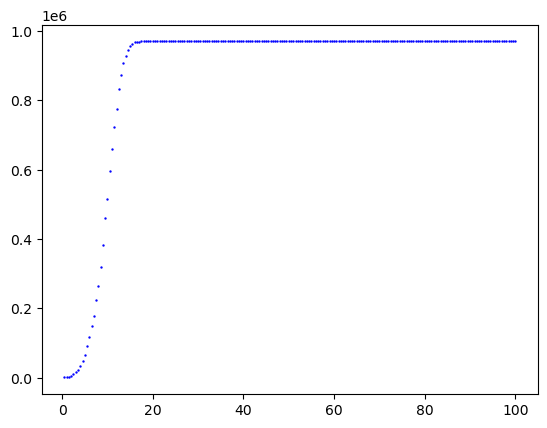

In [28]:
plt.scatter(radius, minkowski_volume, s=0.5, c='blue', marker='o')  # s=100 controls the size of the points


# Change with Radius for a Cube

100%|██████████| 20/20 [00:29<00:00,  1.48s/it]


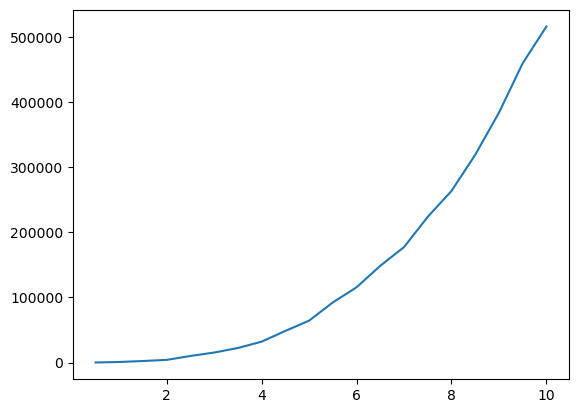

In [5]:
# Parameters
volume_size = 5  # Number of sub-cubes in each dimension
sub_cube_size = 20  # Size of each sub-cube
ball_radius = 0.5  # Radius of each ball


# Function to add balls to the volume
def add_balls(volume, sub_cube_size, ball_radius):
    # Create a grid of coordinates
    z, y, x = np.indices(volume.shape)

    # Initialize indices for the center of each sub-cube
    centers = np.array([(i * sub_cube_size + sub_cube_size // 2, 
                         j * sub_cube_size + sub_cube_size // 2, 
                         k * sub_cube_size + sub_cube_size // 2) 
                        for i in range(volume_size) 
                        for j in range(volume_size) 
                        for k in range(volume_size)])
    
    # Iterate over the centers and set the corresponding regions to True
    for center_x, center_y, center_z in centers:
        dist_from_center = np.sqrt((x - center_x)**2 + (y - center_y)**2 + (z - center_z)**2)
        volume[dist_from_center <= ball_radius] = True
    return volume


def minkowski_change_with_radius(ball_radius):
    # Create the 3D volume
    volume = np.zeros((volume_size * sub_cube_size, volume_size * sub_cube_size, volume_size * sub_cube_size), dtype=bool)

    # Add balls to the volume
    add_balls(volume, sub_cube_size, ball_radius)
    # Compute the Minkowski functionals
    minkowski = mk.functionals(volume)
    return minkowski

radius = [0.5 + i * 0.5 for i in range(20)]
minkowski_volume = []

for ball_radius in tqdm(radius):
    minkowski_volume.append(minkowski_change_with_radius(ball_radius=ball_radius)[0])

plt.plot(radius, minkowski_volume,)
    